In [61]:
import h3
import numpy as np
import pandas as pd
import pydeck as pdk
import seaborn as sns
from cflp_function import *
from shapely.geometry import Polygon
from calculate_od import *

In [13]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd

In [35]:
hex = pd.read_csv('./hex/d_to_inlet_hex_complete.csv')
get_fill_color(hex, "value", "magma")

Unnamed: 0             hex9      value           color
0               0  891f1600003ffff  6534.5710  [248, 117, 92]
1               1  891f160000bffff  6188.1636  [249, 125, 93]
2               2  891f160000fffff  6431.4520  [248, 119, 92]
3               3  891f1600013ffff  6781.6190  [246, 112, 91]
4               4  891f1600017ffff  7062.7300  [245, 106, 91]
...           ...              ...        ...             ...
14822       14822  891f16d5ec7ffff  8580.9550  [228, 78, 100]
14823       14823  891f16d5ecbffff  9025.3560  [221, 73, 104]
14824       14824  891f16d5ecfffff  8681.5710  [226, 77, 101]
14825       14825  891f16d5ed3ffff  9394.3200  [215, 69, 107]
14826       14826  891f16d5ed7ffff  8991.5190  [221, 73, 104]

[14827 rows x 4 columns]

In [119]:
# Define a layer to display on a map
layer = pdk.Layer(
    "H3HexagonLayer",
    MAP,
    pickable=True,
    # stroked=True,
    filled=True,
    extruded=False,
    auto_highlight=True,
    opacity=0.6,
    get_hexagon="hex9",
    get_fill_color = "color", 
    get_line_color=[255, 255, 255],
    line_width_min_pixels=0.1
    )

# Set the viewport location
view_state = pdk.ViewState(longitude=6.747489560596507, latitude=52.316862707395394, zoom=9, bearing=0, pitch=0)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state, tooltip={"text": "Count: {value}"})
r.to_html("h3_layer.html")

In [67]:
from pysal.lib import weights
from libpysal.io import open as psopen
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation

c:\Users\User\anaconda3\envs\scip\lib\site-packages\spaghetti\network.py:40: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
c:\Users\User\anaconda3\envs\scip\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
hex.head()

Unnamed: 0             hex9      value           color
0           0  891f1600003ffff  6534.5710  [248, 117, 92]
1           1  891f160000bffff  6188.1636  [249, 125, 93]
2           2  891f160000fffff  6431.4520  [248, 119, 92]
3           3  891f1600013ffff  6781.6190  [246, 112, 91]
4           4  891f1600017ffff  7062.7300  [245, 106, 91]

In [28]:

def cell_to_shapely_polygon(h3_index):
    """
    A function to convert H3 index to Shapely polygons

    """
    # hex_center_coords = h3.h3_to_geo(h3_index)
    coords = h3.h3_to_geo_boundary(h3_index)
    flipped = tuple(coord[::-1] for coord in coords)
    # center_point = Point(hex_center_coords)
    return Polygon(flipped) #, center_point

In [29]:
hex['geometry'] = hex['hex9'].apply(cell_to_shapely_polygon) # can change the function here
gdf = gpd.GeoDataFrame(hex, geometry='geometry', crs=4326)

In [31]:
gdf

Unnamed: 0             hex9      value           color  \
0               0  891f1600003ffff  6534.5710  [248, 117, 92]   
1               1  891f160000bffff  6188.1636  [249, 125, 93]   
2               2  891f160000fffff  6431.4520  [248, 119, 92]   
3               3  891f1600013ffff  6781.6190  [246, 112, 91]   
4               4  891f1600017ffff  7062.7300  [245, 106, 91]   
...           ...              ...        ...             ...   
14822       14822  891f16d5ec7ffff  8580.9550  [228, 78, 100]   
14823       14823  891f16d5ecbffff  9025.3560  [221, 73, 104]   
14824       14824  891f16d5ecfffff  8681.5710  [226, 77, 101]   
14825       14825  891f16d5ed3ffff  9394.3200  [215, 69, 107]   
14826       14826  891f16d5ed7ffff  8991.5190  [221, 73, 104]   

                                                geometry  
0      POLYGON ((7.03636 52.34060, 7.03663 52.33900, ...  
1      POLYGON ((7.03435 52.33791, 7.03462 52.33631, ...  
2      POLYGON ((7.03920 52.33848, 7.03947 52.33687, ...  
3      POLYGON ((7.03352 52.34273, 7.03380 52.34112, ...  
4      POLYGON ((7.03838 52.34329, 7.03865 52.34169, ...  
...                                                  ...  
14822  POLYGON ((6.50425 52.46852, 6.50454 52.46692, ...  
14823  POLYGON ((6.49742 52.46524, 6.49770 52.46364, ...  
14824  POLYGON ((6.50226 52.46583, 6.50255 52.46423, ...  
14825  POLYGON ((6.49656 52.47004, 6.49685 52.46844, ...  
14826  POLYGON ((6.50140 52.47063, 6.50169 52.46903, ...  

[14827 rows x 5 columns]

In [37]:
w_queen = weights.Queen.from_dataframe(gdf, use_index=True)

c:\Users\User\anaconda3\envs\scip\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 3 islands with ids: 2412, 4229, 6677.
  warnings.warn(message)


In [42]:
w_queen.min_neighbors

0

In [43]:
w_queen.max_neighbors

6

In [44]:
w_queen.islands

[2412, 4229, 6677]

In [69]:
# Drop the islands
gdf = gdf.drop(w_queen.islands)
w = weights.Queen.from_dataframe(gdf, use_index=True)

c:\Users\User\anaconda3\envs\scip\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [70]:
w.transform = 'R'

In [77]:
gdf['value_std'] = (gdf['value'] - gdf['value'].mean()) / gdf['value'].std()

In [78]:
gdf['lag_std'] = weights.lag_spatial(w, gdf['value_std'])

In [79]:
gdf

Unnamed: 0             hex9      value           color  \
0               0  891f1600003ffff  6534.5710  [248, 117, 92]   
1               1  891f160000bffff  6188.1636  [249, 125, 93]   
2               2  891f160000fffff  6431.4520  [248, 119, 92]   
3               3  891f1600013ffff  6781.6190  [246, 112, 91]   
4               4  891f1600017ffff  7062.7300  [245, 106, 91]   
...           ...              ...        ...             ...   
14822       14822  891f16d5ec7ffff  8580.9550  [228, 78, 100]   
14823       14823  891f16d5ecbffff  9025.3560  [221, 73, 104]   
14824       14824  891f16d5ecfffff  8681.5710  [226, 77, 101]   
14825       14825  891f16d5ed3ffff  9394.3200  [215, 69, 107]   
14826       14826  891f16d5ed7ffff  8991.5190  [221, 73, 104]   

                                                geometry  spatial_lag  \
0      POLYGON ((7.03636 52.34060, 7.03663 52.33900, ...  6540.606000   
1      POLYGON ((7.03435 52.33791, 7.03462 52.33631, ...  6257.945450   
2      POLYGON ((7.03920 52.33848, 7.03947 52.33687, ...  6351.161700   
3      POLYGON ((7.03352 52.34273, 7.03380 52.34112, ...  6759.280650   
4      POLYGON ((7.03838 52.34329, 7.03865 52.34169, ...  7064.147325   
...                                                  ...          ...   
14822  POLYGON ((6.50425 52.46852, 6.50454 52.46692, ...  8572.575217   
14823  POLYGON ((6.49742 52.46524, 6.49770 52.46364, ...  8927.479250   
14824  POLYGON ((6.50226 52.46583, 6.50255 52.46423, ...  8631.429833   
14825  POLYGON ((6.49656 52.47004, 6.49685 52.46844, ...  9314.567250   
14826  POLYGON ((6.50140 52.47063, 6.50169 52.46903, ...  8973.904667   

        lag_std  value_std  
0     -0.281342  -0.282787  
1     -0.349038  -0.365751  
2     -0.326713  -0.307484  
3     -0.228970  -0.223620  
4     -0.155955  -0.156294  
...         ...        ...  
14822  0.205311   0.207318  
14823  0.290310   0.313751  
14824  0.219407   0.231415  
14825  0.383017   0.402117  
14826  0.301429   0.305647  

[14824 rows x 8 columns]

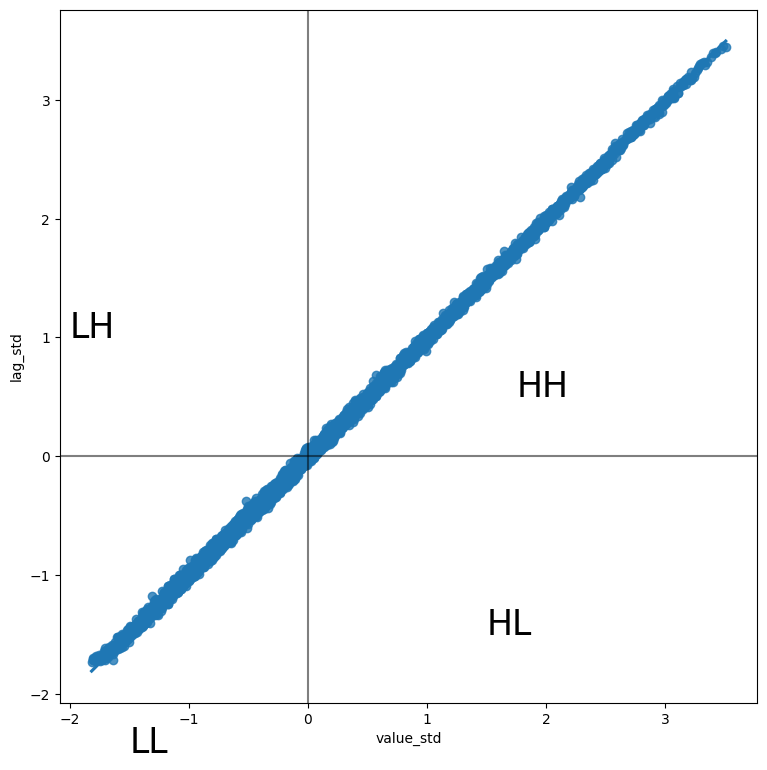

In [81]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='value_std', y='lag_std', data=gdf, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.text(1.75, 0.5, "HH", fontsize=25)
plt.text(1.5, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1.5, -2.5, "LL", fontsize=25)
# Display
plt.show()

In [82]:
lisa = esda.Moran_Local(gdf['value'], w)

In [83]:
# Break observations into significant or not
gdf['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
gdf['quadrant'] = lisa.q

(<Figure size 640x480 with 1 Axes>, <Axes: >)

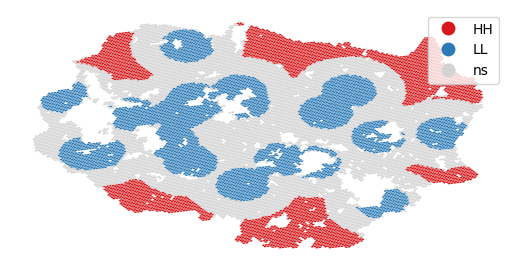

In [86]:
lisa_cluster(lisa, gdf)

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

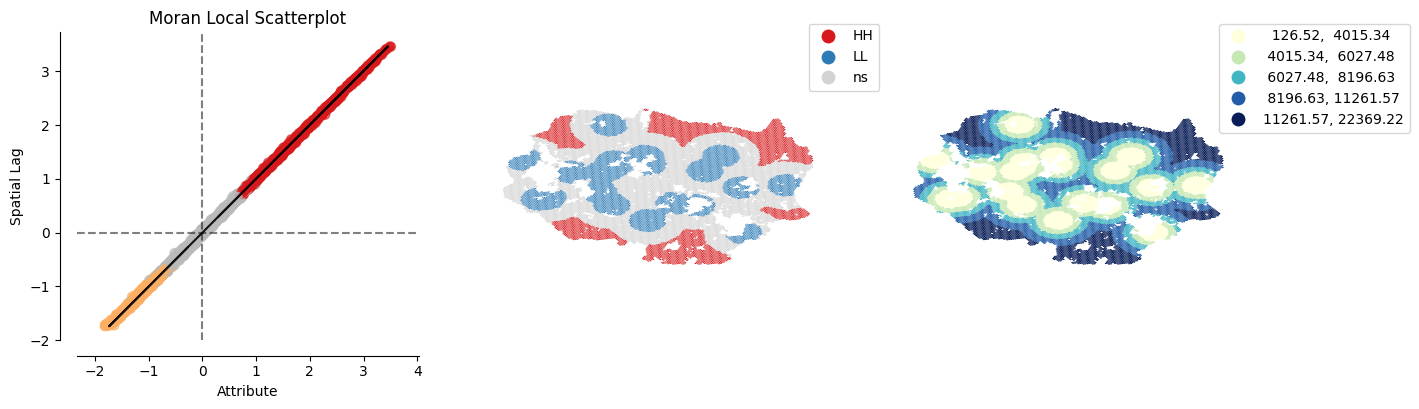

In [87]:
plot_local_autocorrelation(lisa, gdf, 'value')

In [118]:
MAP = pd.read_csv('./hex/hex_df.csv')

In [97]:
map.head()

Unnamed: 0             hex9           color  fuzzy  \
0           0  891f1600003ffff  [226, 77, 101]  0.616   
1           1  891f160000bffff  [225, 76, 102]  0.612   
2           2  891f160000fffff  [226, 77, 101]  0.613   
3           3  891f1600013ffff   [234, 85, 96]  0.640   
4           4  891f1600017ffff   [235, 86, 96]  0.644   

                                            geometry  
0  POLYGON ((7.03636 52.34060, 7.03663 52.33900, ...  
1  POLYGON ((7.03435 52.33791, 7.03462 52.33631, ...  
2  POLYGON ((7.03920 52.33848, 7.03947 52.33687, ...  
3  POLYGON ((7.03352 52.34273, 7.03380 52.34112, ...  
4  POLYGON ((7.03838 52.34329, 7.03865 52.34169, ...

In [90]:
map['geometry'] = map['hex9'].apply(cell_to_shapely_polygon) # can change the function here
map = gpd.GeoDataFrame(map, geometry='geometry', crs=4326)

In [94]:
map = map.drop(w_queen.islands)

In [95]:
W = weights.Queen.from_dataframe(map, use_index=True)

c:\Users\User\anaconda3\envs\scip\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [98]:
W.transform='R'

In [99]:
map['value_std'] = (map['fuzzy'] - map['fuzzy'].mean()) / map['fuzzy'].std()
map['lag_std'] = weights.lag_spatial(W, map['value_std'])

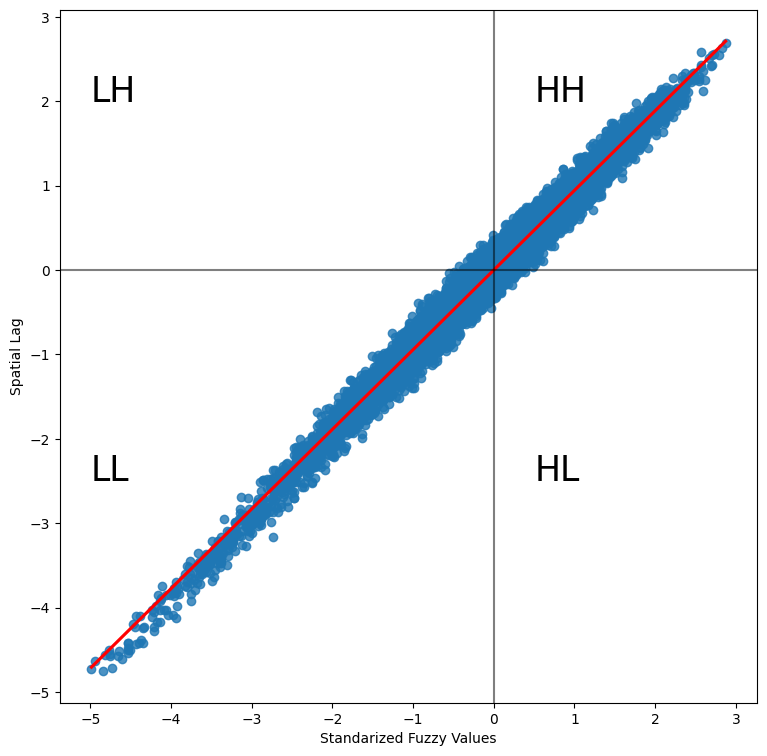

In [113]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='value_std', y='lag_std', data=map, ci=None, line_kws=dict(color="r"))
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
ax.set_xlabel('Standarized Fuzzy Values')
plt.axhline(0, c='k', alpha=0.5)
ax.set_ylabel('Spatial Lag')
plt.text(0.5, 2, "HH", fontsize=25)
plt.text(0.5, -2.5, "HL", fontsize=25)
plt.text(-5, 2, "LH", fontsize=25)
plt.text(-5, -2.5, "LL", fontsize=25)
# Display
plt.show()

In [102]:
lisa = esda.Moran_Local(map['fuzzy'], w)
# Break observations into significant or not
map['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
map['quadrant'] = lisa.q

(<Figure size 640x480 with 1 Axes>, <Axes: >)

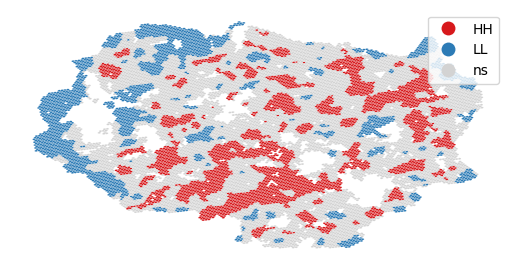

In [103]:
lisa_cluster(lisa, map)

In [122]:
map

Unnamed: 0             hex9           color  fuzzy  \
0               0  891f1600003ffff  [226, 77, 101]  0.616   
1               1  891f160000bffff  [225, 76, 102]  0.612   
2               2  891f160000fffff  [226, 77, 101]  0.613   
3               3  891f1600013ffff   [234, 85, 96]  0.640   
4               4  891f1600017ffff   [235, 86, 96]  0.644   
...           ...              ...             ...    ...   
14822       14822  891f16d5ec7ffff   [229, 80, 99]  0.624   
14823       14823  891f16d5ecbffff   [238, 93, 93]  0.660   
14824       14824  891f16d5ecfffff   [238, 93, 93]  0.657   
14825       14825  891f16d5ed3ffff  [221, 73, 104]  0.598   
14826       14826  891f16d5ed7ffff  [218, 71, 105]  0.590   

                                                geometry  value_std   lag_std  \
0      POLYGON ((7.03636 52.34060, 7.03663 52.33900, ...  -1.113108 -0.934183   
1      POLYGON ((7.03435 52.33791, 7.03462 52.33631, ...  -1.178171 -1.048044   
2      POLYGON ((7.03920 52.33848, 7.03947 52.33687, ...  -1.161905 -1.232390   
3      POLYGON ((7.03352 52.34273, 7.03380 52.34112, ...  -0.722728 -0.649531   
4      POLYGON ((7.03838 52.34329, 7.03865 52.34169, ...  -0.657664 -0.665797   
...                                                  ...        ...       ...   
14822  POLYGON ((6.50425 52.46852, 6.50454 52.46692, ...  -0.982981 -0.915207   
14823  POLYGON ((6.49742 52.46524, 6.49770 52.46364, ...  -0.397411 -0.344547   
14824  POLYGON ((6.50226 52.46583, 6.50255 52.46423, ...  -0.446209 -0.492295   
14825  POLYGON ((6.49656 52.47004, 6.49685 52.46844, ...  -1.405892 -1.214769   
14826  POLYGON ((6.50140 52.47063, 6.50169 52.46903, ...  -1.536019 -1.346251   

       significant  quadrant  
0             True         3  
1             True         3  
2             True         3  
3            False         3  
4            False         3  
...            ...       ...  
14822         True         3  
14823        False         3  
14824        False         3  
14825         True         3  
14826         True         3  

[14824 rows x 9 columns]

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

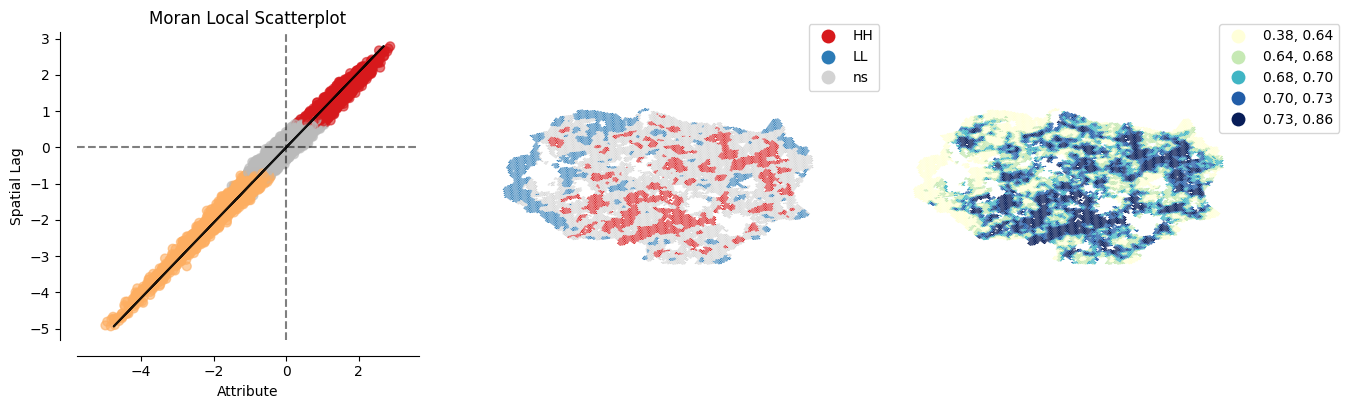

In [121]:
plot_local_autocorrelation(lisa, map, 'fuzzy')

In [126]:
n = gpd.read_file('./osm_network/G_n.shp')
n.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [127]:
n = n.to_crs('EPSG:4326')

<Axes: >

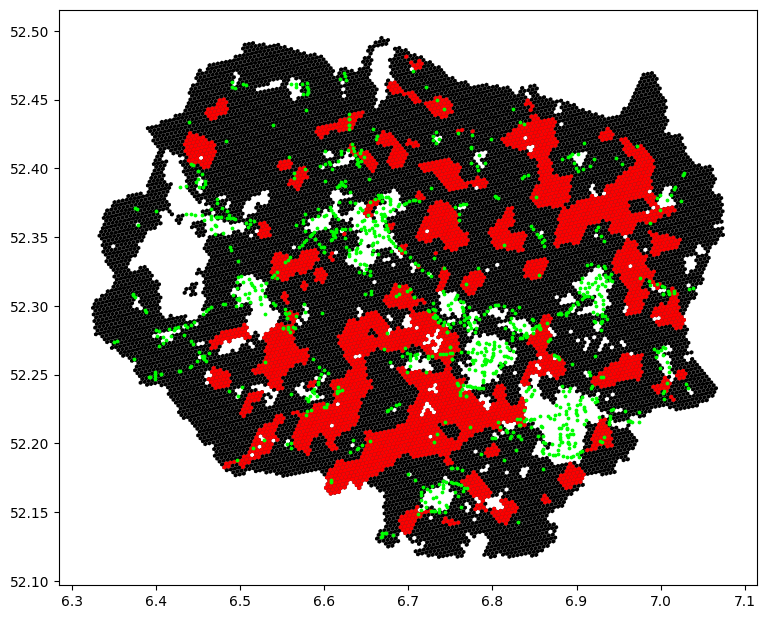

In [133]:
ax = map.plot(color='k', figsize=(9, 9))
map[(map['significant'] == True) & (map['quadrant'] == 1)].plot(color='red', ax=ax)
n.plot(color='lime', ax=ax, markersize=3)

In [50]:
queen_card = pd.Series(w_queen.cardinalities)

(array([3.0000e+00, 1.7000e+01, 0.0000e+00, 9.9000e+01, 0.0000e+00,
        4.3100e+02, 8.3200e+02, 0.0000e+00, 1.3300e+03, 1.2115e+04]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

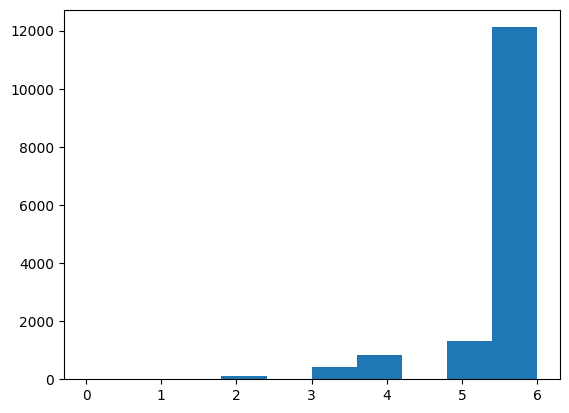

In [52]:
plt.hist(queen_card, bins=10)

In [46]:
w_rook = weights.Rook.from_dataframe(gdf, use_index=True)

c:\Users\User\anaconda3\envs\scip\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
 There are 3 islands with ids: 2412, 4229, 6677.
  warnings.warn(message)


In [53]:
rook_card = pd.Series(w_rook.cardinalities)

(array([3.0000e+00, 1.7000e+01, 0.0000e+00, 9.9000e+01, 0.0000e+00,
        4.3100e+02, 8.3200e+02, 0.0000e+00, 1.3300e+03, 1.2115e+04]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

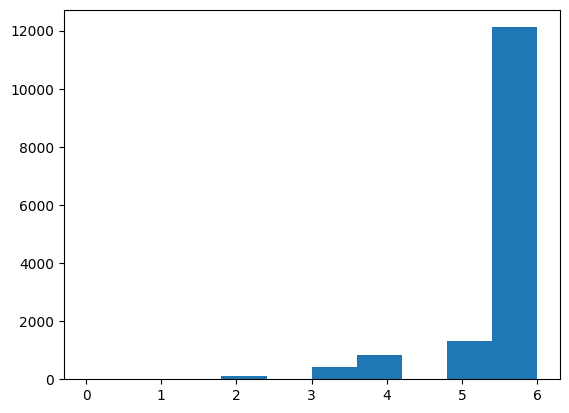

In [54]:
plt.hist(rook_card, bins=10)

In [55]:
# Row-standardize the queen matrix, 'R' = row, with all the neighbors of a given observation adding up to one.
w_queen.transform = 'R'

('WARNING: ', 2412, ' is an island (no neighbors)')
('WARNING: ', 4229, ' is an island (no neighbors)')
('WARNING: ', 6677, ' is an island (no neighbors)')


In [57]:
# Compute spatial lag 
lag = weights.lag_spatial(w_queen, gdf['value'])

In [60]:
gdf['spatial_lag'] = lag

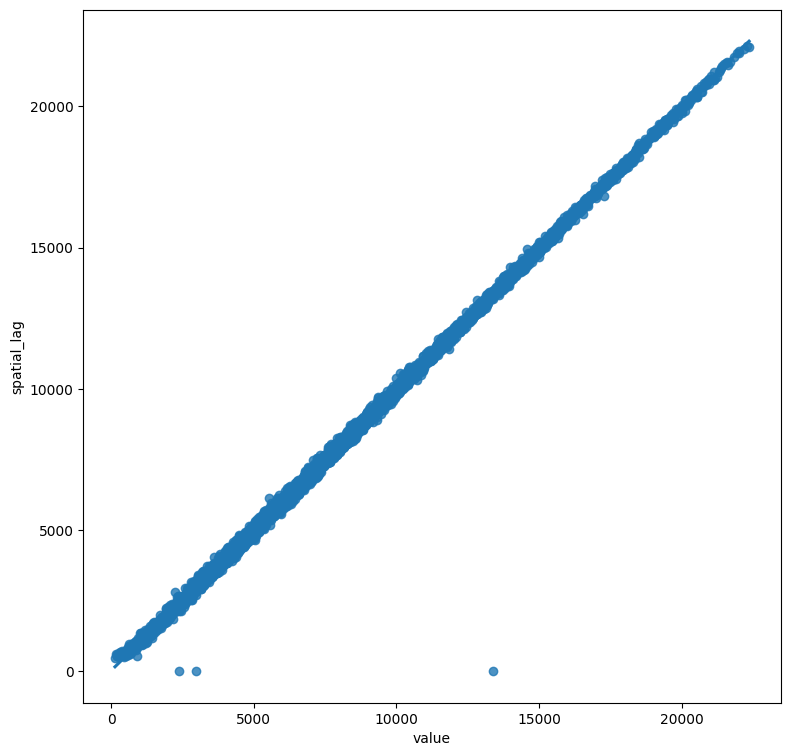

In [63]:
fig, ax = plt.subplots(1, figsize=(9,9))
sns.regplot(x='value', y='spatial_lag', data=gdf, ci=None)
plt.show()

In [64]:
# Standardize spatial weights 
std_v = (gdf['value'] - gdf['value'].mean()) / gdf['value'].std()

In [65]:
std_w = pd.Series(weights.lag_spatial(w_queen, std_v), index=std_v.index)

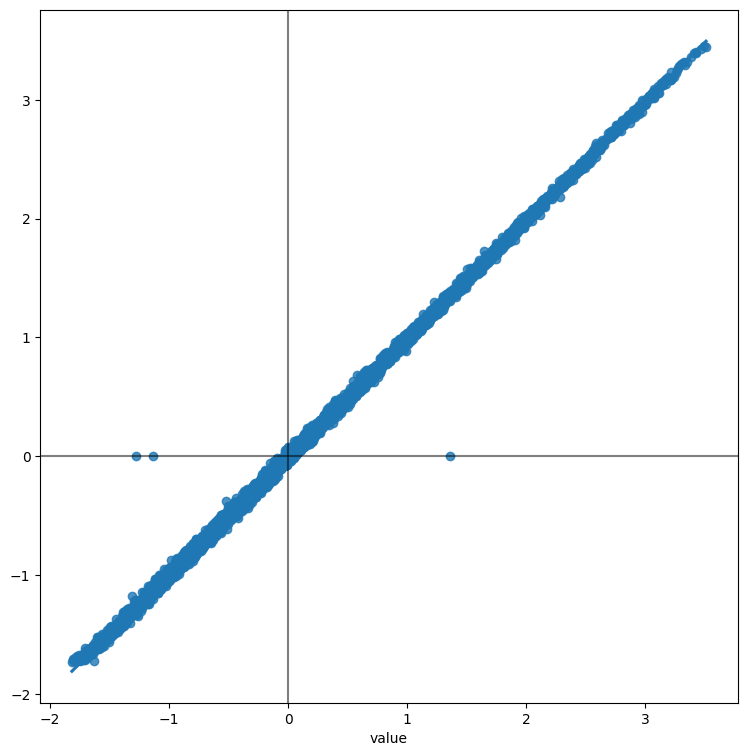

In [66]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x=std_v, y=std_w, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()